## Zad. 1
### Dobierz optymalny estymator, wykorzystując:
* #### walidację krzyżową dla k=10, 
* #### przydzielony do Ciebie typ scalera,
* #### przydzielony do Ciebie typ modelu. 

### Przeszukaj przestrzeń hiperparametrów w poszukiwaniu najlepszego modelu, który będzie skutecznie szacował wartość domu.

### Dla najlepszego modelu wyznacz (wartości średnie z walidacji krzyżowej):
* #### MAE,
* #### MSE,
* #### RMSE,
* #### MAPE.

### Wyniki przestaw w tabeli w Google Sheets, dołączając w kolumnie *info* wybrane optymalne hiperparamtery.

#### Poniżej kod z przykładem, który pomoże Ci zacząć ;)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
data = pd.read_csv('boston_ready.csv')

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


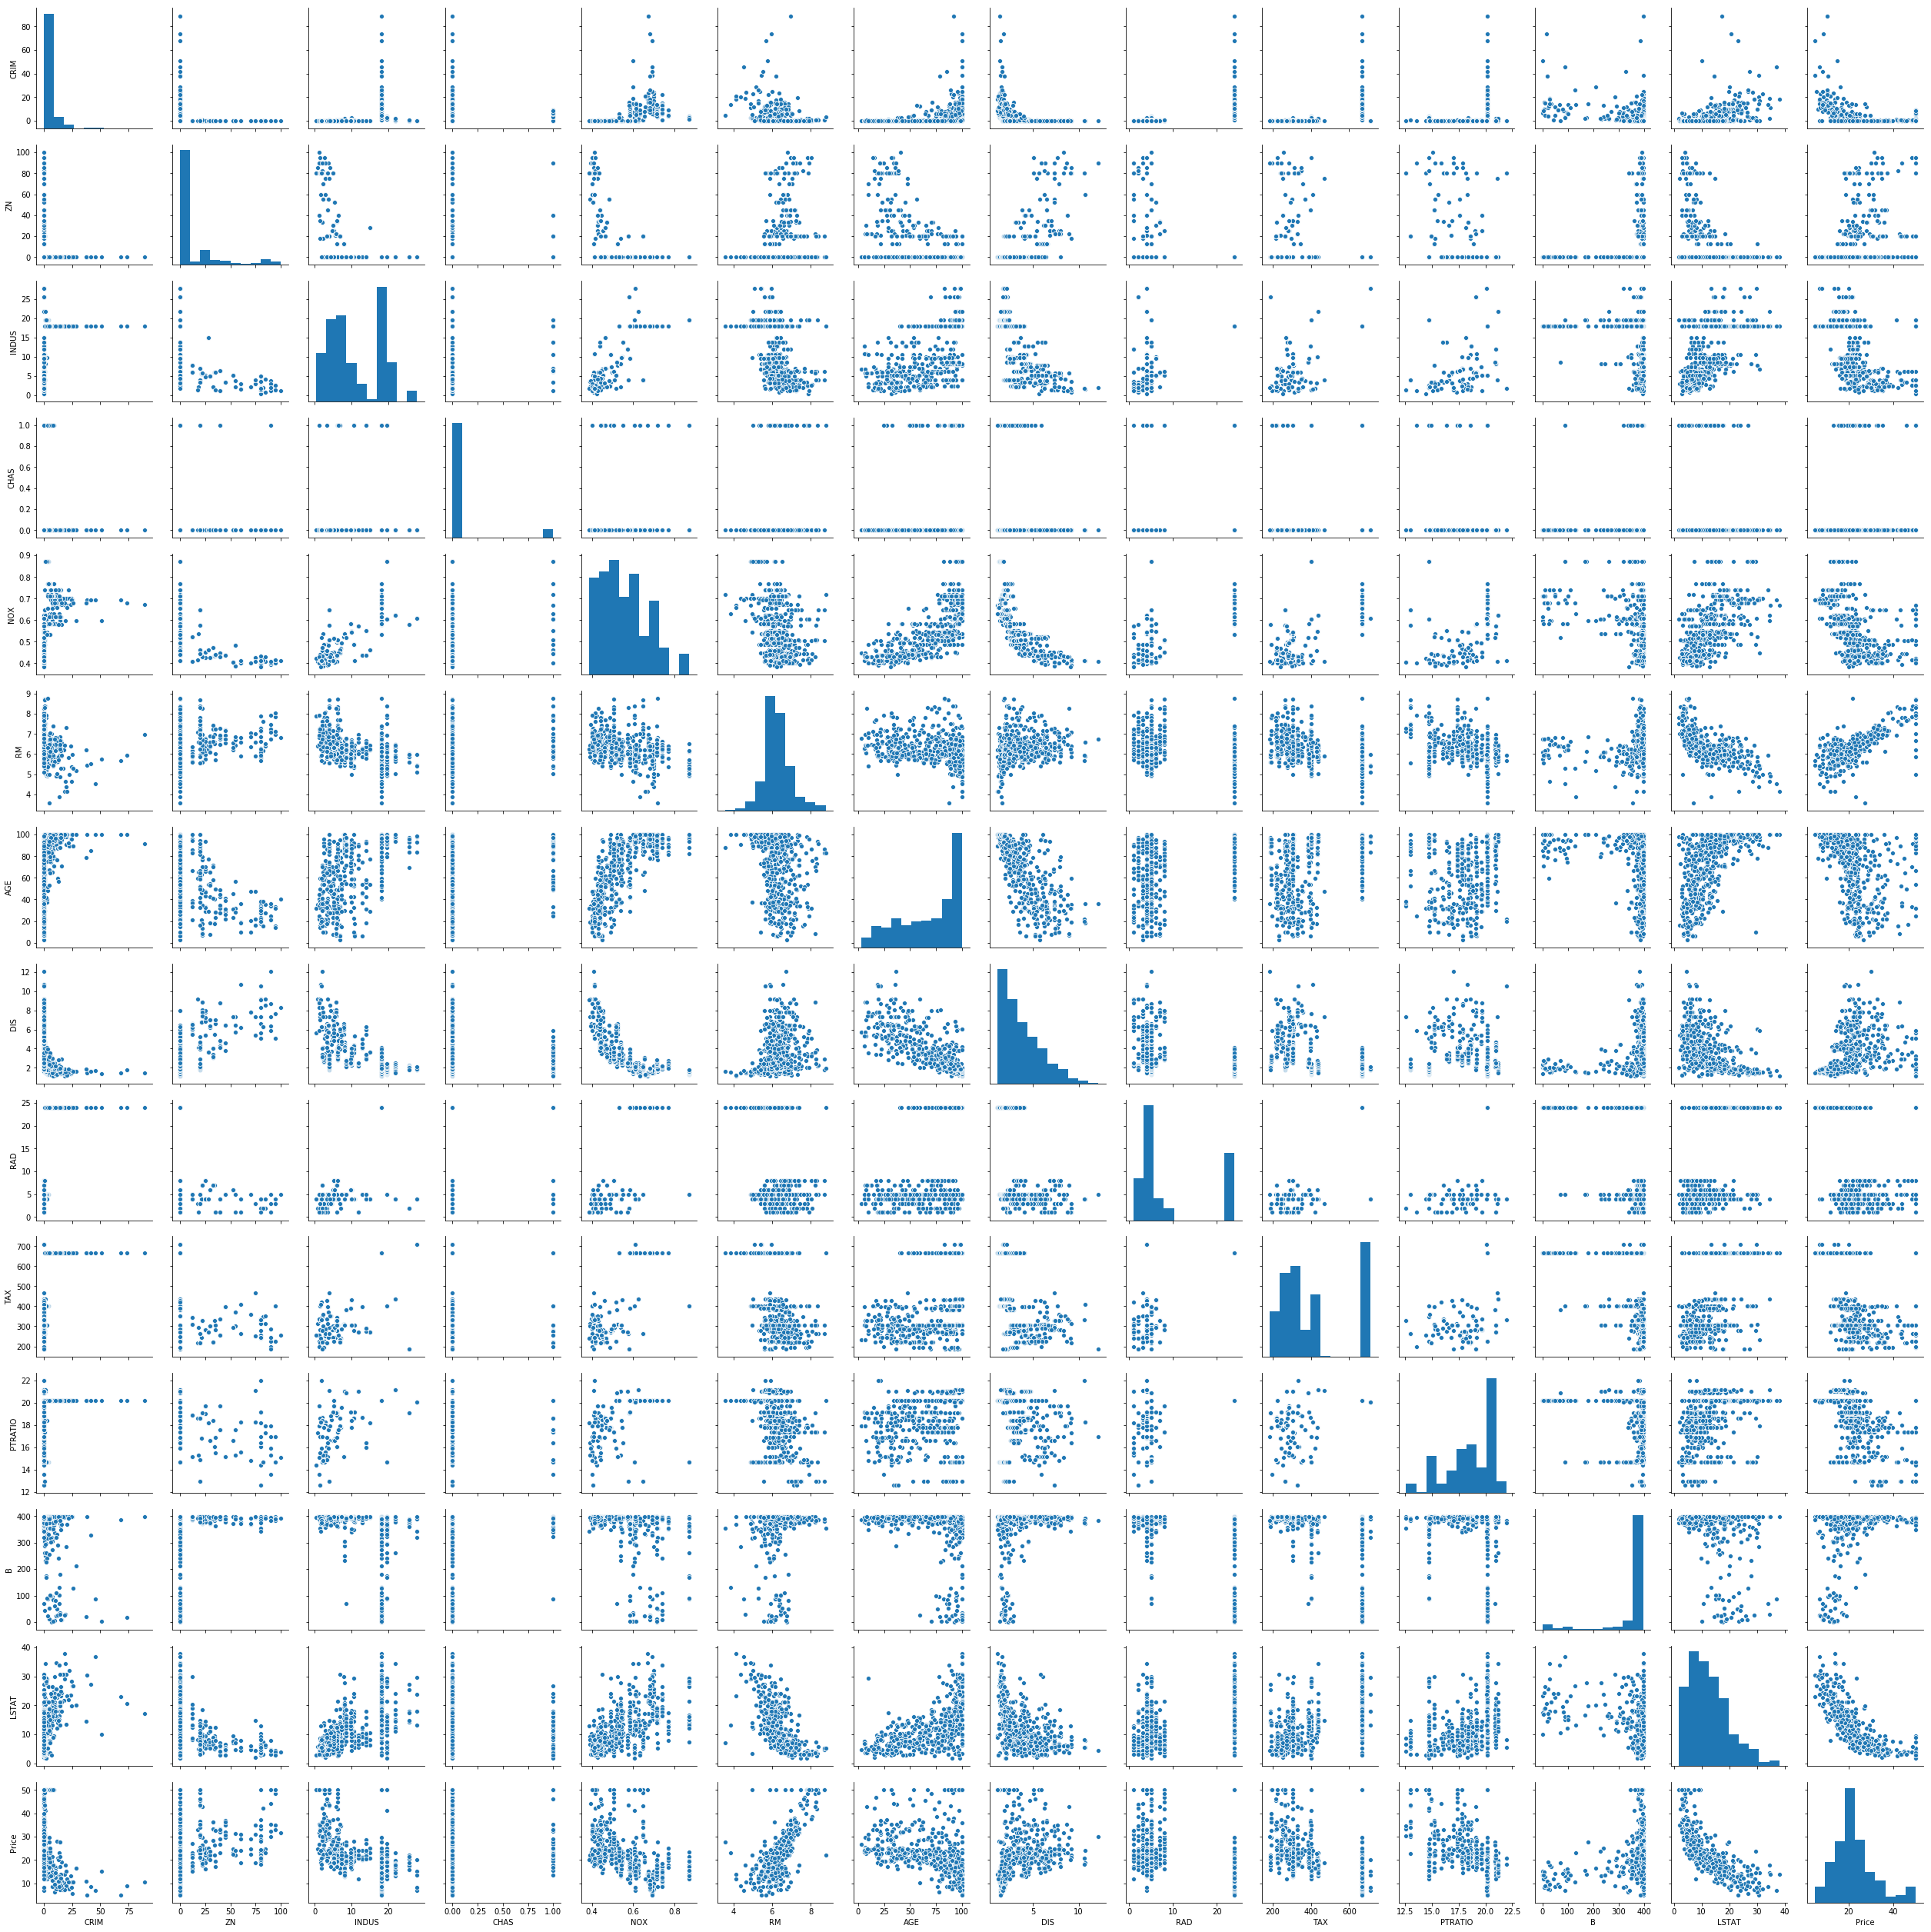

In [3]:
sns.pairplot(data)

In [10]:
data_y = data[['Price']]

In [11]:
data_y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
data_X = data.drop('Price', axis=1)

In [20]:
data_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
scaler_X = MinMaxScaler() # Twój scaler
scaler_y = MinMaxScaler() # Twój scaler

In [22]:
X = scaler_X.fit_transform(data_X)

In [23]:
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [24]:
X.shape

(506, 13)

In [25]:
y = scaler_y.fit_transform(data_y)

In [26]:
y

array([[0.42222222],
       [0.36888889],
       [0.66      ],
       [0.63111111],
       [0.69333333],
       [0.52666667],
       [0.39777778],
       [0.49111111],
       [0.25555556],
       [0.30888889],
       [0.22222222],
       [0.30888889],
       [0.37111111],
       [0.34222222],
       [0.29333333],
       [0.33111111],
       [0.40222222],
       [0.27777778],
       [0.33777778],
       [0.29333333],
       [0.19111111],
       [0.32444444],
       [0.22666667],
       [0.21111111],
       [0.23555556],
       [0.19777778],
       [0.25777778],
       [0.21777778],
       [0.29777778],
       [0.35555556],
       [0.17111111],
       [0.21111111],
       [0.18222222],
       [0.18      ],
       [0.18888889],
       [0.30888889],
       [0.33333333],
       [0.35555556],
       [0.43777778],
       [0.57333333],
       [0.66444444],
       [0.48      ],
       [0.45111111],
       [0.43777778],
       [0.36      ],
       [0.31777778],
       [0.33333333],
       [0.257

In [28]:
y.shape

(506, 1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Przykład trenowania Regresji Liniowej (bez walidacji krzyżowej i doboru hiperparametrów)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg_lin = LinearRegression()

In [33]:
reg_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred = reg_lin.predict(X_test)

In [35]:
y_pred_r = scaler_y.inverse_transform(y_pred)
y_test_r = scaler_y.inverse_transform(y_test)

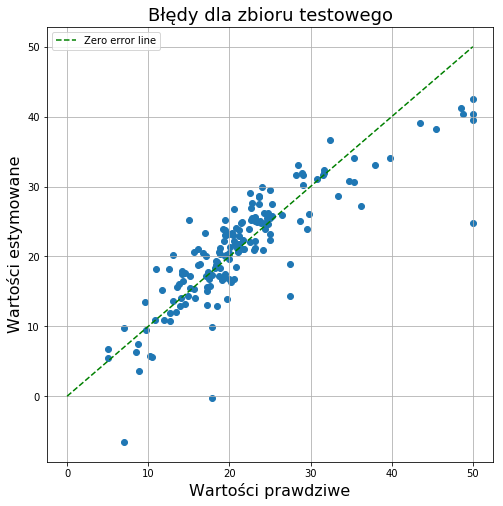

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_r.ravel(), y_pred_r.ravel())
plt.plot([0, y_test_r.max()], [0, y_test_r.max()], 'g--', label='Zero error line')
plt.legend()
plt.xlabel('Wartości prawdziwe', size=16)
plt.ylabel('Wartości estymowane', size=16)
plt.title('Błędy dla zbioru testowego', size=18)
plt.grid()

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y_test_r, y_pred_r)

20.747143360308876

Analogicznie wyliczamy:
* MAE,
* RMSE, 
* MAPE